
# Boop boop

In [451]:
import importlib

import numpy as np
import torch
import matplotlib.pyplot as plt

import utils
import models

In [354]:
from parse_data import articles_list

In [404]:
encoding = utils.get_encoding(articles_list)
char2int, int2char, int2hot, str2hot, hot2int, hot2str = encoding

In [430]:
importlib.reload(models)

hot_size = len(char2int)

rnn_net_25 = models.RNNModule(hot_size, 25)
rnn_net_50 = models.RNNModule(hot_size, 50)
rnn_net_100 = models.RNNModule(hot_size, 100)
rnn_net_100_2 = models.RNNModule(hot_size, 100, 2)
rnn_net_100_3 = models.RNNModule(hot_size, 100, 3)
rnn_net_100 = models.RNNModule(hot_size, 200)

lstm_net_25 = models.LSTMModule(hot_size, 25)
lstm_net_50 = models.LSTMModule(hot_size, 50)
lstm_net_100 = models.LSTMModule(hot_size, 100)
lstm_net_100_2 = models.LSTMModule(hot_size, 100, 2)
lstm_net_100_3 = models.LSTMModule(hot_size, 100, 3)
lstm_net_100 = models.LSTMModule(hot_size, 200)

In [431]:
#train rnn_net_25
losses_rnn_25 = models.train(rnn_net_25, articles_list, char_encoding)

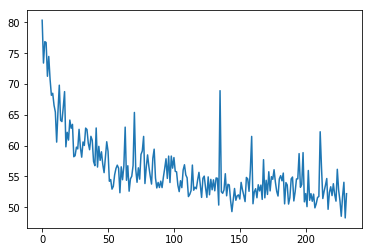

In [459]:
plt.plot(losses_rnn_25)
plt.show()

In [446]:
models.predict(rnn_net_25, char_encoding, "= The", 200)

"= The lawing  the thelunmed digesoca. Solusalssman whal condioce nwhanlatine', dureetain the resetean exples cones's can ie wering graysty farch coupic warlt purme intd whamile of on the and the baly krala"

In [235]:
#train rnn_net_50
losses_rnn_50 = models.train(rnn_net_50, articles_list, char_encoding)

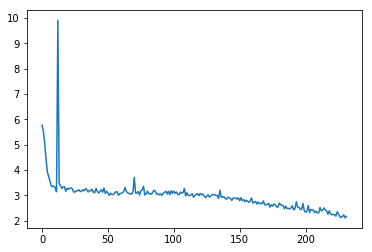

In [236]:
plt.plot(losses_rnn_50)
plt.show()

In [237]:
models.predict(rnn_net_50, char_encoding, "Very cool")

'+iih d κo e .n’vaTasilopetnt מkiieeooooon2dナiaea aralo9oK.tonrtua— ,d gwlḥorluliam8w a\u200apcnsebins"ḥaa'

In [238]:
#train rnn_net_100
losses_rnn_100 = models.train(rnn_net_100, articles_list, char_encoding)

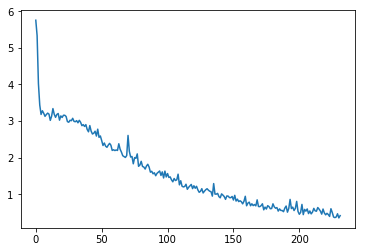

In [239]:
plt.plot(losses_rnn_100)
plt.show()

In [240]:
models.predict(rnn_net_100, char_encoding, "Very cool")

'ololorororororororoMuo,ouououomorororororororacakananananininininAndndndididigigigieipipipipiɛicicic'

In [447]:
#train lstm_net_25
losses_lstm_25 = models.train(lstm_net_25, articles_list, char_encoding)

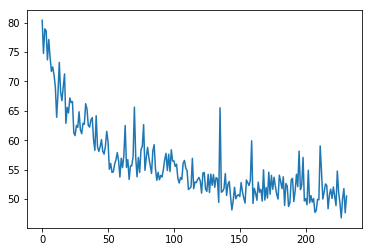

In [448]:
plt.plot(losses_lstm_25)
plt.show()

In [457]:
importlib.reload(models)
models.predict(lstm_net_25, char_encoding, "a whale")

"a whales is whastich 7 31è, meal meatibation yeans.\nThar whact-ally hagan is on ''Nuin, betomeres a heve ni"

In [318]:
#train lstm_net_50
losses_lstm_50 = models.train(lstm_net_50, articles_list, char_encoding)

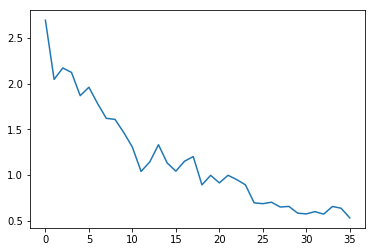

In [319]:
plt.plot(losses_lstm_50)
plt.show()

In [323]:
models.predict(lstm_net_50, char_encoding, "Very cool")

'Very coolollsllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll'

In [324]:
#train lstm_net_100
losses_lstm_100 = models.train(lstm_net_100, articles_list, char_encoding, batch_size=100, reset_hidden=False)

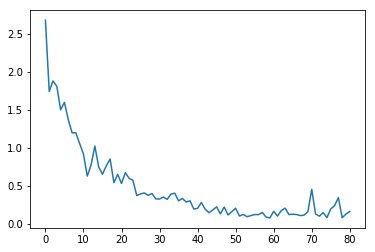

In [325]:
plt.plot(losses_lstm_100)
plt.show()

In [347]:
models.predict(lstm_net_100, char_encoding, "What", 1000)

'Whatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatitititititititititititititititititititititititititititititititititititititititititititititititititititititititititip|ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppsppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppupppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppspspspspspspsssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

In [ ]:
#train lstm_net_100
importlib.reload(models)
lstm_net_100_3 = models.LSTMModule(len(char2int), 100, 3)
losses_lstm_100_3 = models.train(lstm_net_100_3, articles_list, char_encoding, batch_size=100)

In [ ]:
plt.plot(losses_lstm_100_3)
plt.show()
print(models.predict(lstm_net_100_3, char_encoding, "Wh", 200))